<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Dimensionality%20Reduction/Comparison_of_LDA_and_PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Principal Component Analysis (PCA) - identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

## Load the data

In [5]:
# The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) 
# with 4 attributes: sepal length, sepal width, petal length and petal width
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

## Scale the data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [61]:
from sklearn.decomposition import PCA

# Number of components to keep. if n_components is not set all components are kept:
pca = PCA()
pca_df = pca.fit_transform(X_scaled)
print("Shape of pca_df",pca_df.shape)

Shape of pca_df (150, 4)


### Explained variance

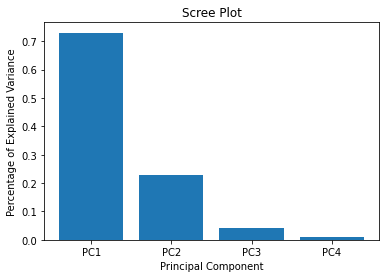

In [21]:
variance = np.round(pca.explained_variance_ratio_, decimals=2)
labels = ['PC'+str(i+1) for i in range(len(variance))]
plt.bar(np.arange(len(variance)), variance, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### Loading scores

In [23]:
pca_loadings = pd.DataFrame(pca.components_.T, columns=labels, index=['sepal length', 'sepal width', 'petal length', 'petal width'])
pca_loadings

,PC1,PC2,PC3,PC4
sepal length,0.521066,0.377418,-0.719566,-0.261286
sepal width,-0.269347,0.923296,0.244382,0.123510
petal length,0.580413,0.024492,0.142126,0.801449
petal width,0.564857,0.066942,0.634273,-0.523597


### 2D projection of Iris dataset

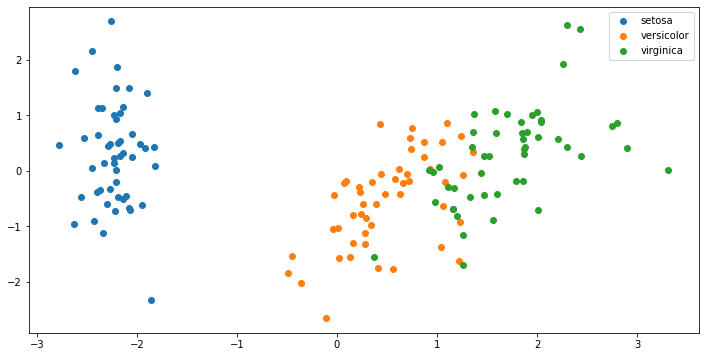

In [46]:
plt.figure(figsize=(12,6))
for i, name in enumerate(iris.target_names):
  plt.scatter(pca_df[y==i,0], pca_df[y==i,1], label=name)
plt.legend()
plt.show()

## Linear Discriminant Analysis

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
# If None, will be set to min(n_classes - 1, n_features). 
# This parameter only affects the transform method.
lda = LinearDiscriminantAnalysis()
lda_data = lda.fit_transform(X_scaled, y) 
print('Shape of lda_data:',lda_data.shape)

Shape of lda_data: (150, 2)


### Explained variance

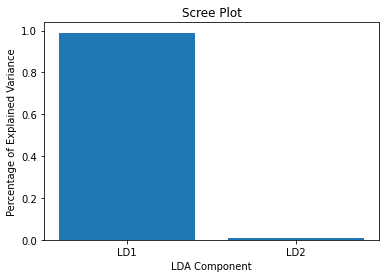

In [56]:
lda_variance = np.round(lda.explained_variance_ratio_, decimals=2)
plt.bar(np.arange(len(lda_variance)), lda_variance, tick_label=['LD1','LD2'])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('LDA Component')
plt.title('Scree Plot')
plt.show()

### Weights

In [52]:
lda_weights = pd.DataFrame(lda.coef_, index=iris.target_names, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
lda_weights

,sepal length,sepal width,petal length,petal width
setosa,5.211578,5.273453,-29.815608,-15.778857
versicolor,-1.263701,-1.901001,8.261573,2.326624
virginica,-3.947878,-3.372451,21.554036,13.452234


### 2D projection of Iris dataset

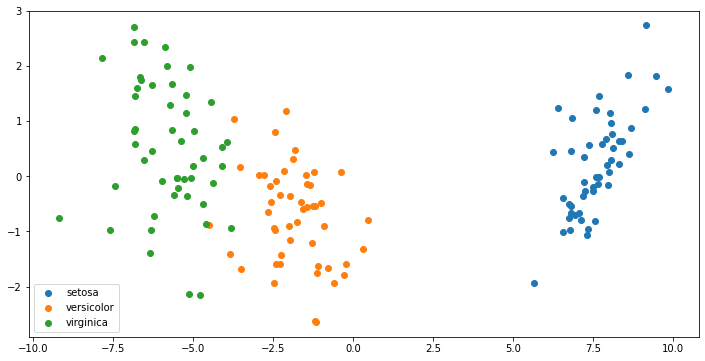

In [57]:
plt.figure(figsize=(12,6))
for i, name in enumerate(iris.target_names):
  plt.scatter(lda_data[y==i,0], lda_data[y==i,1], label=name)
plt.legend()
plt.show()